In [2]:
!pip install tensorflow opencv-python matplotlib

In [3]:
!pip list

Package                       Version
----------------------------- ----------
absl-py                       2.0.0
accelerate                    0.24.1
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
ale-py                        0.8.1
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse    

In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

/var/folders/l2/ry0mt9hj6ql_54_nf6x6n8h00000gn/T/ipykernel_43426/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'Car-Bike-Dataset'

In [34]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [40]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list Car-Bike-Dataset/Bike/Bike (136).jpg
Image not in ext list Car-Bike-Dataset/Bike/Bike (138).jpg


In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 3997 files belonging to 2 classes.


In [42]:
data_iterator = data.as_numpy_iterator()

In [43]:
batch = data_iterator.next()

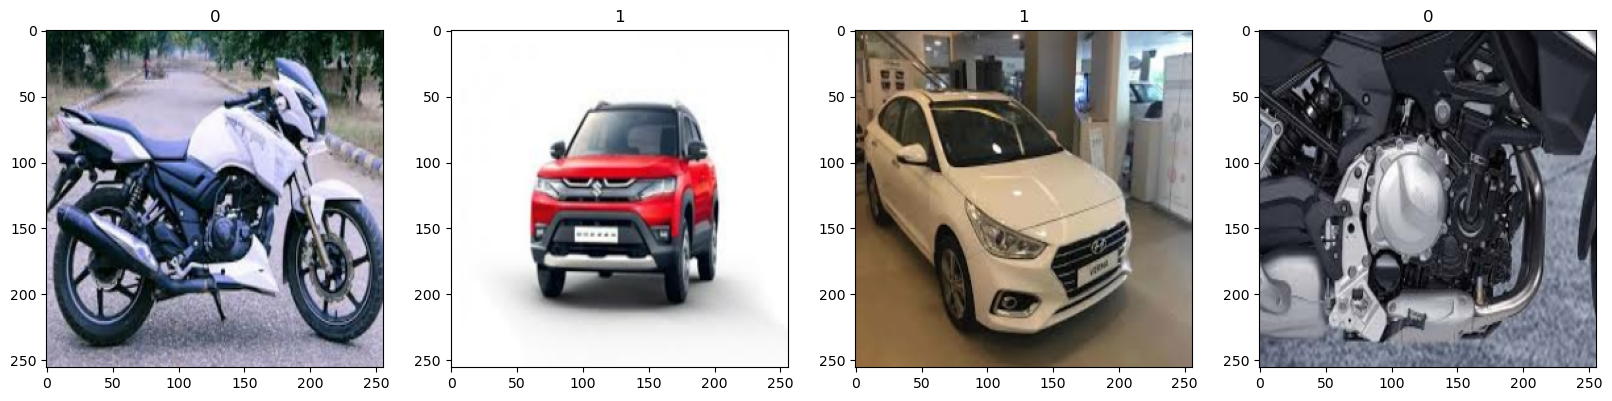

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [45]:
data = data.map(lambda x,y: (x/255, y))

In [46]:
data.as_numpy_iterator().next()

(array([[[[0.01975337, 0.13347887, 0.29034162],
          [0.02396599, 0.13769148, 0.29542738],
          [0.03254442, 0.14626992, 0.3109758 ],
          ...,
          [0.19652267, 0.357307  , 0.48279718],
          [0.19215687, 0.3529412 , 0.4714614 ],
          [0.19593291, 0.35671723, 0.47436428]],
 
         [[0.01975337, 0.13347887, 0.29034162],
          [0.02446567, 0.13819116, 0.29592708],
          [0.03495078, 0.14867628, 0.31338215],
          ...,
          [0.21521686, 0.37600115, 0.49783581],
          [0.216593  , 0.37737733, 0.49539784],
          [0.21845797, 0.3792423 , 0.49688935]],
 
         [[0.01971159, 0.13343708, 0.29029983],
          [0.02421462, 0.13794011, 0.29567602],
          [0.03824695, 0.15197244, 0.31667835],
          ...,
          [0.24173748, 0.4025218 , 0.52162415],
          [0.24949448, 0.4102788 , 0.52792585],
          [0.24993107, 0.41071537, 0.52836245]],
 
         ...,
 
         [[0.17759651, 0.291322  , 0.44818473],
          [0.17747

In [47]:
len(data)

125

In [48]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [49]:
train_size,val_size,test_size

(87, 25, 13)

In [50]:
train_size+val_size+test_size

125

In [51]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [57]:
logdir='logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
87/87 [==============================] - 19s 218ms/step - loss: 0.5631 - accuracy: 0.7328 - val_loss: 0.4187 - val_accuracy: 0.8025
Epoch 2/20
87/87 [==============================] - 19s 217ms/step - loss: 0.2621 - accuracy: 0.9009 - val_loss: 0.2228 - val_accuracy: 0.9125
Epoch 3/20
87/87 [==============================] - 19s 216ms/step - loss: 0.1719 - accuracy: 0.9335 - val_loss: 0.2329 - val_accuracy: 0.9075
Epoch 4/20
87/87 [==============================] - 19s 216ms/step - loss: 0.1395 - accuracy: 0.9418 - val_loss: 0.1810 - val_accuracy: 0.9388
Epoch 5/20
87/87 [==============================] - 19s 216ms/step - loss: 0.0959 - accuracy: 0.9684 - val_loss: 0.2236 - val_accuracy: 0.9162
Epoch 6/20
87/87 [==============================] - 19s 217ms/step - loss: 0.0663 - accuracy: 0.9745 - val_loss: 0.2314 - val_accuracy: 0.9275
Epoch 7/20
87/87 [==============================] - 19s 218ms/step - loss: 0.0550 - accuracy: 0.9810 - val_loss: 0.1870 - val_accuracy: 0.9425

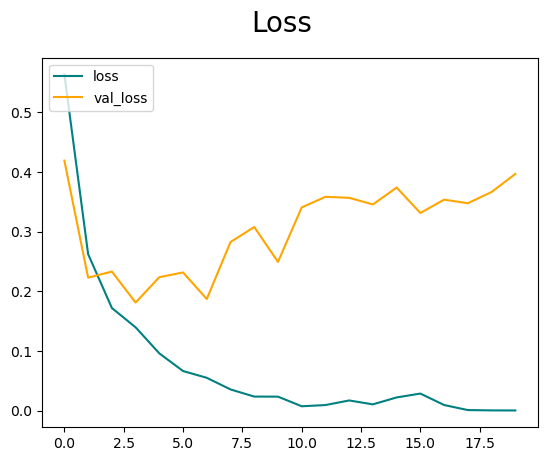

In [60]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

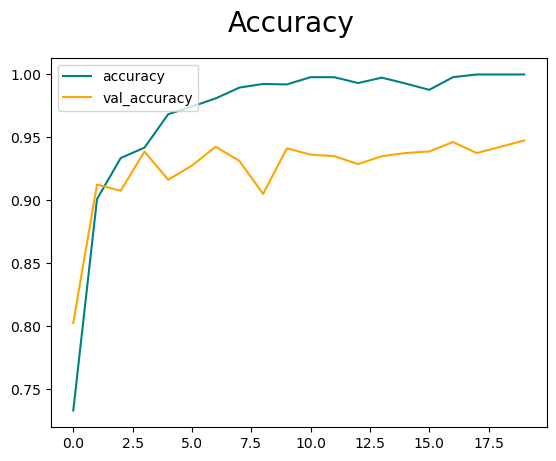

In [61]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [74]:
image_path='Car-Bike-Dataset/Bike/Bike (4).jpg'

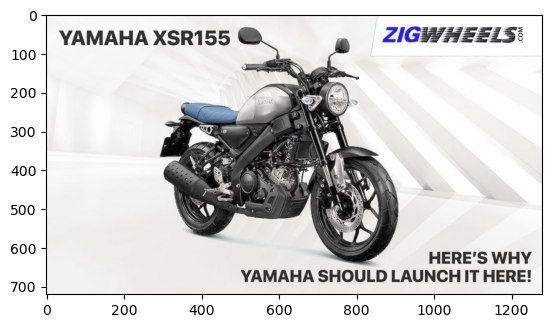

In [75]:
img = cv2.imread(image_path)
plt.imshow(img)
plt.show()

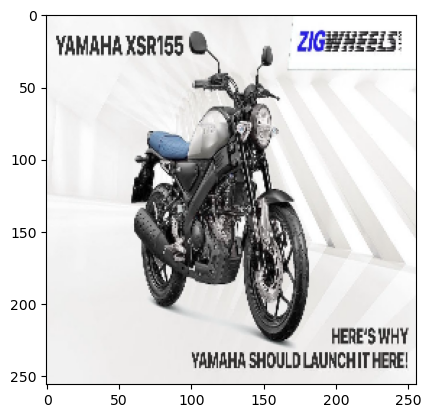

In [76]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [77]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 15ms/step


In [78]:
yhat

array([[3.0643894e-11]], dtype=float32)

In [79]:
if yhat > 0.5: 
    print(f'Predicted class is bike')
else:
    print(f'Predicted class is car')

Predicted class is car
